# KMeans Clustering

This notebook demonstrates a KMeans algorithm tested on the SPAETH Clustering Dataset.

In [7]:
import sys
import numpy as np
from kmeans import KMeansModel
from matplotlib import pyplot as plt
%matplotlib inline

Load the data and store each pair of x, y in a `np.array`

In [8]:
lines = []
with open('../data/spaeth_08.txt') as f:
    for l in f:
        if '#' not in l:
            lines.append(l.strip('\n'))
        line = f.readline()
        

data = []
for line in lines:
    parts = line.split()
    if len(parts) == 2:
        x = float(parts[0])
        y = float(parts[1])
        data.append(np.array([x, y]))

Create a KMeans model. The parameter `k` indicates how many clusters to group the data into

In [14]:
model = KMeansModel(data)
model.learn(k=4)

## Visualize the results
Each cluster is represented in a unique color with a red circle representing the __centroid__.

[]

/Users/jeremy/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


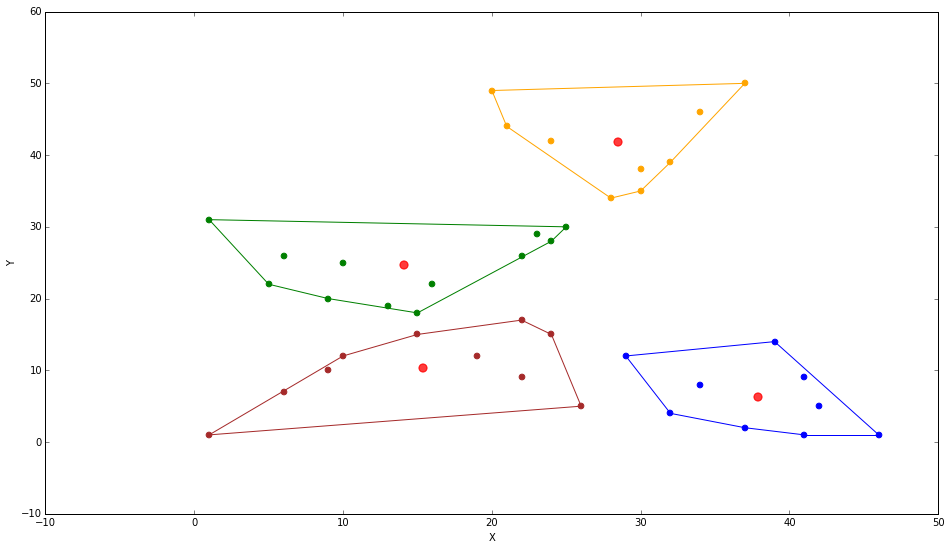

In [15]:
from collections import deque
from scipy.spatial import ConvexHull

x = [data[0] for v in data]
y = [data[1] for v in data]
colors = deque(['b', 'r', 'w', 'k', 'c', 'm', 'y', 'g', 'orange', 'brown'])

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
for k in model.clusters:
    # draw the convex hull of each cluster
    hull = ConvexHull(model.clusters[k])
    for simplex in hull.simplices:
        plt.plot(np.array(model.clusters[k])[simplex, 0], np.array(model.clusters[k])[simplex, 1], 'k-', c=colors[0])
        
    # plot each point in each cluster in the scatter plot 
    x = [v[0] for v in model.clusters[k]]
    y = [v[1] for v in model.clusters[k]]
    ax.scatter(x, y, color=colors[0], s=32)
    colors.rotate()

for mean in model.means:
    x = [v[0] for v in model.means]
    y = [v[1] for v in model.means]
    ax.scatter(x, y, color='r', s=64, alpha=0.3)

ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot()